<a href="https://colab.research.google.com/github/wtpdenman/LIGO/blob/main/Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Those 2 lines are just to avoid some harmless warnings when importing packages
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

In [ ]:
# -- Use the following line in Google Colab
! pip install -U -q bilby==2.4.0 matplotlib==3.10.0 dynesty==2.1.5 corner==2.2.3 gwpy==3.0.12 lalsuite==7.25 numpy==1.26.0 PyCBC==2.4.1

In [ ]:
import numpy as np
# The first import of matplotlib can take some time (especially on cloud platforms). This is normal.
import matplotlib.pyplot as plt

import bilby
from bilby.core.prior import Uniform, PowerLaw
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

# Make bilby more terse
bilby.core.utils.log.setup_logger(log_level='WARNING')

from gwpy.timeseries import TimeSeries

In [ ]:

# -- download data
! wget https://dcc.ligo.org/public/0187/G2300818/001/challenge3_2048hz.gwf

# -- for gwpy
from gwpy.timeseries import TimeSeries
# gwpy_strain = TimeSeries.read('challenge3.gwf', channel="L1:CHALLENGE3",'H1:CHALLENGE3')
# gwpy_strain_l1 = TimeSeries.read('challenge3.gwf', channel="L1:CHALLENGE3")

# -- for pycbc
from pycbc import frame
#pycbc_strain = frame.read_frame('challenge3.gwf', 'H1:CHALLENGE3')

--2025-05-16 16:14:00--  https://dcc.ligo.org/public/0187/G2300818/001/challenge3_2048hz.gwf
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.133
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128414228 (122M)
Saving to: ‘challenge3_2048hz.gwf’

challenge3_2048hz.g 100%[===================>] 122.46M  41.5MB/s    in 3.0s    

2025-05-16 16:14:04 (41.5 MB/s) - ‘challenge3_2048hz.gwf’ saved [128414228/128414228]



In [ ]:
H1 = bilby.gw.detector.get_empty_interferometer("H1")
L1 = bilby.gw.detector.get_empty_interferometer("L1")
sampling_rate = 2048  # needs to be high enough for the signals found in steps above
duration = 70 # needs to be long enough for the signals found in steps above
start_time = 0  # needs to be set so that the segment defined by [start_time,start_time+duration] contains the signal

interferometers = bilby.gw.detector.InterferometerList([])
for ifo_name in ['H1', 'L1']:
    ifo = bilby.gw.detector.get_empty_interferometer(ifo_name)
    ifo.set_strain_data_from_frame_file('challenge3.gwf', sampling_rate, duration, start_time=start_time, channel=f'{ifo_name}:CHALLENGE3')
    interferometers.append(ifo)

In [ ]:
gwpy_strain_h1 = TimeSeries.read('challenge3_2048hz.gwf', channel="H1:CHALLENGE3")
gwpy_strain_l1 = TimeSeries.read('challenge3_2048hz.gwf', channel="L1:CHALLENGE3")

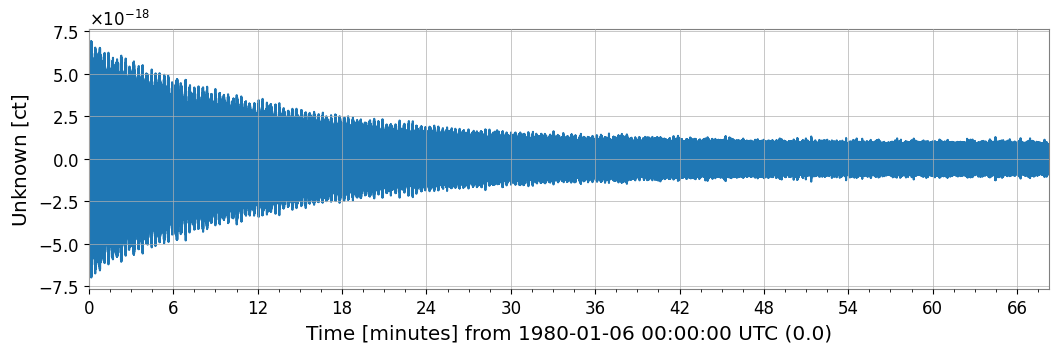

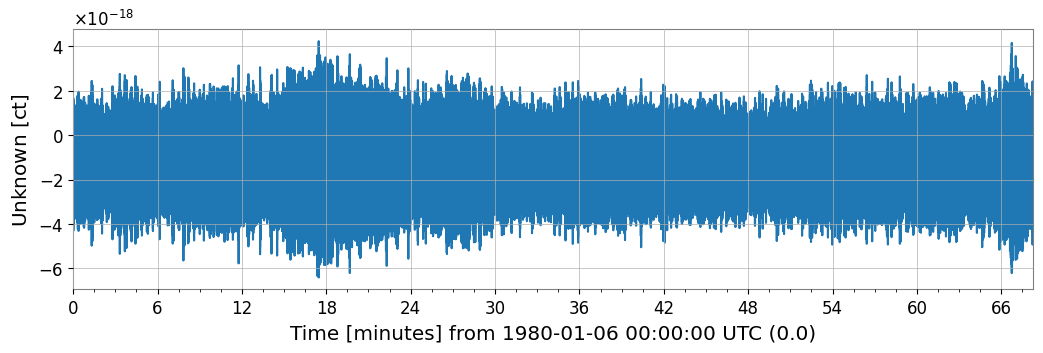

In [ ]:
gwpy_strain_h1.plot()
gwpy_strain_l1.plot()
plt.show()

In [ ]:
# Definite times in relation to the trigger time (time_of_event), duration and post_trigger_duration
post_trigger_duration = 70
duration = 70
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

L1_analysis_data = TimeSeries.fetch_open_data(
    "L1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)